### Libraries

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar


In [3]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib
import kaleido


In [6]:
import src.dataexplore as exp

In [7]:
exp.main_libraries()

In [8]:
exp.col_explore(df['genre1'])

KeyError: 'genre1'

In [9]:
exp.testing(df['genre1'])

KeyError: 'genre1'

### Insert Clean Export

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('data/clean-and-merged_movies.csv')

In [10]:
df.genre = df.genre.str.replace(' ','')

In [11]:
df[['genre1', 'genre2', 'genre3']] = df['genre'].str.split(',', expand=True)

In [12]:
df

,Unnamed: 0,Date,Title_net,Title_imdb,genre,rating,genre1,genre2,genre3
0,0,2023-01-29,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2023-01-29,Arrested Development,Arrested Development,Comedy,8.7,Comedy,None,None
2,7,2023-01-28,Wednesday,Wednesday,"Comedy,Crime,Fantasy",8.2,Comedy,Crime,Fantasy
3,9,2023-01-14,The Pale Blue Eye,The Pale Blue Eye,"Crime,Horror,Mystery",6.6,Crime,Horror,Mystery
4,10,2023-01-08,1899,1899,"Drama,Mystery",7.4,Drama,Mystery,None
...,...,...,...,...,...,...,...,...,...
239,809,2019-03-22,The Dirt,The Dirt,"Biography,Comedy,Drama",7.0,Biography,Comedy,Drama
240,810,2019-03-18,Triple Frontier,Triple Frontier,"Action,Thriller",6.4,Action,Thriller,None
241,816,2019-04-03,Serenity,Serenity,"Drama,Mystery,Thriller",5.4,Drama,Mystery,Thriller
242,820,2019-02-27,Velvet Buzzsaw,Velvet Buzzsaw,"Horror,Mystery,Thriller",5.7,Horror,Mystery,Thriller


### Q1: Which genre(s) am I most likely to watch on Netflix?

In [13]:
# Reshape the data frame using melt
df_genre = df.melt(id_vars=['Title_net', 'genre'], value_vars=['genre1', 'genre2', 'genre3'], var_name='Genre-order', value_name='Genre-count')

# Assign weights to categories
weights = {'genre1': 1, 'genre2': 0.5, 'genre3': 0.3}
df_genre['Weighted-counts'] = df_genre['Genre-order'].map(weights)

# Group the melted data frame by title and category
df_genres = df_genre.groupby(['Genre-count'])['Weighted-counts'].sum().reset_index()

df_genres.sample(5)

,Genre-count,Weighted-counts
3,Biography,6.5
10,Game-Show,3.0
0,Action,73.8
2,Animation,20.0
16,Romance,10.3


In [23]:
fig = px.line_polar(df_genres, r='Weighted-counts', theta='Genre-count', line_close=True,
                    title='Which genre(s) am I most likely to watch the most on Netflix?')
fig.update_layout(title_x=0.5)
fig.write_image("images/genre_graph.png")
fig.show()


### Q2: Which months I have Netflix & Chilled the most recently?

In [15]:
#months
df['Month'] = pd.DatetimeIndex(df['Date']).month
df

,Unnamed: 0,Date,Title_net,Title_imdb,genre,rating,genre1,genre2,genre3,Month
0,0,2023-01-29,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN,1
1,3,2023-01-29,Arrested Development,Arrested Development,Comedy,8.7,Comedy,None,None,1
2,7,2023-01-28,Wednesday,Wednesday,"Comedy,Crime,Fantasy",8.2,Comedy,Crime,Fantasy,1
3,9,2023-01-14,The Pale Blue Eye,The Pale Blue Eye,"Crime,Horror,Mystery",6.6,Crime,Horror,Mystery,1
4,10,2023-01-08,1899,1899,"Drama,Mystery",7.4,Drama,Mystery,None,1
...,...,...,...,...,...,...,...,...,...,...
239,809,2019-03-22,The Dirt,The Dirt,"Biography,Comedy,Drama",7.0,Biography,Comedy,Drama,3
240,810,2019-03-18,Triple Frontier,Triple Frontier,"Action,Thriller",6.4,Action,Thriller,None,3
241,816,2019-04-03,Serenity,Serenity,"Drama,Mystery,Thriller",5.4,Drama,Mystery,Thriller,4
242,820,2019-02-27,Velvet Buzzsaw,Velvet Buzzsaw,"Horror,Mystery,Thriller",5.7,Horror,Mystery,Thriller,2


In [16]:
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [17]:
#transform counts in dataframe
df_seasons = df['Month'].value_counts()
df_seasons = pd.DataFrame(df_seasons)
df_seasons = df_seasons.reset_index()
df_seasons.rename(columns={'index': 'Month',
'Month': 'counts'},
inplace=True, errors='raise')

In [18]:
df_seasons

,Month,counts
0,Mar,29
1,Dec,26
2,Apr,25
3,Jan,23
4,Nov,23
5,Sep,23
6,Jul,23
7,Jun,17
8,May,17
9,Aug,15


In [19]:
#sort by month name
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df_seasons = df_seasons.sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x]))
df_seasons.reset_index(drop=True, inplace=True)

In [20]:
df_seasons

,Month,counts
0,Jan,23
1,Feb,10
2,Mar,29
3,Apr,25
4,May,17
5,Jun,17
6,Jul,23
7,Aug,15
8,Sep,23
9,Oct,13


In [21]:
seasons = ['Winter','Winter','Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter']

In [22]:
df_seasons = df_seasons.assign(Season=seasons)
df_seasons

,Month,counts,Season
0,Jan,23,Winter
1,Feb,10,Winter
2,Mar,29,Spring
3,Apr,25,Spring
4,May,17,Spring
5,Jun,17,Summer
6,Jul,23,Summer
7,Aug,15,Summer
8,Sep,23,Autumn
9,Oct,13,Autumn


In [28]:
fig = px.area(df_seasons, x='Month', y="counts", pattern_shape="Season", color="Season", line_shape='spline', pattern_shape_sequence=[".", "|", "x", "/"])
fig.write_image("images/seasons.png")
fig.show()

### Q3: How do the seasons affect my choices?

In [25]:
#transform to list
df['genre_list'] = df['genre'].str.split(',')
df_cross = df.explode('genre_list', ignore_index = True)

In [26]:
# create a list of bars for each genre
bars = [go.Bar(x=cross_df.index, y=cross_df[col], name=col) for col in cross_df.columns]

# create the plotly layout
layout = go.Layout(barmode='stack')

# create the plotly figure
fig = go.Figure(data=bars, layout=layout)

# save and show the plotly figure
fig.write_image("images/genre-and-season.png")
fig.show()

NameError: name 'cross_df' is not defined

### Q4: What kind of title am I attracted to the most?

In [ ]:
df.head()

,Unnamed: 0,Date,Title_net,Title_imdb,genre,rating,genre1,genre2,genre3,Month,genre_list
0,0,2023-01-29,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN,Jan,NaN
1,3,2023-01-29,Arrested Development,Arrested Development,Comedy,8.7,Comedy,None,None,Jan,[Comedy]
2,7,2023-01-28,Wednesday,Wednesday,"Comedy,Crime,Fantasy",8.2,Comedy,Crime,Fantasy,Jan,"[Comedy, Crime, Fantasy]"
3,9,2023-01-14,The Pale Blue Eye,The Pale Blue Eye,"Crime,Horror,Mystery",6.6,Crime,Horror,Mystery,Jan,"[Crime, Horror, Mystery]"
4,10,2023-01-08,1899,1899,"Drama,Mystery",7.4,Drama,Mystery,None,Jan,"[Drama, Mystery]"


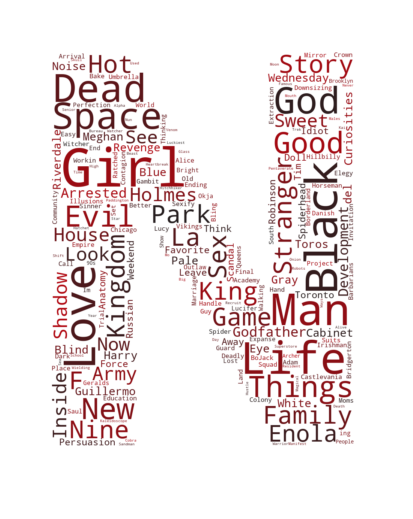

In [ ]:
paintcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
mask = np.array(Image.open('images/Netflix_mask.png'))
text = str(list(df['Title_net'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200, colormap=paintcmap, max_words = 200, mask = mask).generate(text)


plt.figure( figsize=(5,5))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
plt.savefig('images/wordcloud.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
text

'The Godfather Arrested Development Wednesday The Pale Blue Eye 1899 White Noise "Guillermo del Toros Cabinet of Curiosities" Harry & Meghan Riverdale The Gray Man Dead to Me Do Revenge Love Is Blind Persuasion The Man from Toronto Spiderhead "Gods Favorite Idiot" I Think You Should Leave with Tim Robinson The Weekend Away Anatomy of a Scandal Russian Doll Space Force Downsizing Bridgerton The Adam Project Too Hot to Handle After Life The Hand of God Suits Sex Education Bake Squad Sexify "Workin Moms" Deadly Illusions The Old Guard Hillbilly Elegy Colony Bling Empire Alice in Borderland "The Queens Gambit" The Crown "Im Thinking of Ending Things" Lucy The Witcher Barbarians The Trial of the Chicago 7 Ratched Set It Up Castlevania South Park Community The Umbrella Academy Good Girls The 100 Dark The Sinner Easy Extraction The Invitation Family Guy Spider-Man Contagion Better Call Saul Arrival Kingdom The Stranger La La Land Vikings BoJack Horseman The Good Place Black Mirror Marriage St